<a href="https://colab.research.google.com/github/ddoddii/ASHRAE-project/blob/main/Ashrae_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np

In [ ]:
pip install --upgrade xlrd

In [2]:
pip install --upgrade pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
data = pd.read_excel('/content/drive/MyDrive/연세22-1/공학종합설계/Ashrae dataset.xlsx')

# Data Preprocessing

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45768 entries, 0 to 45767
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Season                                45683 non-null  object 
 1   Climate                               45768 non-null  object 
 2   Country                               45768 non-null  object 
 3   Thermal preference                    29642 non-null  object 
 4   Air temperature (°C)                  43594 non-null  float64
 5   Ta_h (°C)                             15403 non-null  float64
 6   Tg_h (°C)                             18262 non-null  float64
 7   Relative humidity (%)                 38133 non-null  float64
 8   Air velocity (m/s)                    45768 non-null  float64
 9   Outdoor monthly air temperature (°C)  43607 non-null  float64
dtypes: float64(6), object(4)
memory usage: 3.5+ MB


In [9]:
data.columns

Index(['Season', 'Climate', 'Country', 'Thermal preference',
       'Air temperature (°C)', 'Ta_h (°C)', 'Tg_h (°C)',
       'Relative humidity (%)', 'Air velocity (m/s)',
       'Outdoor monthly air temperature (°C)'],
      dtype='object')

In [ ]:
data.head(10)

,Season,Climate,Country,Thermal preference,Air temperature (°C),Ta_h (°C),Tg_h (°C),Relative humidity (%),Air velocity (m/s),Outdoor monthly air temperature (°C)
0,Summer,Humid subtropical,Japan,warmer,24.2,24.2,24.0,50.2,0.06,25.0
1,Summer,Humid subtropical,Japan,no change,24.2,24.2,24.0,50.2,0.06,25.0
2,Summer,Humid subtropical,Japan,no change,24.2,24.2,24.0,50.2,0.06,25.0
3,Summer,Humid subtropical,Japan,no change,24.2,24.2,24.0,50.2,0.06,25.0
4,Summer,Humid subtropical,Japan,no change,24.2,24.2,24.0,50.2,0.06,25.0
5,Summer,Humid subtropical,Japan,no change,24.2,24.2,24.0,50.2,0.06,25.0
6,Summer,Humid subtropical,Japan,no change,24.2,24.2,24.0,50.2,0.06,25.0
7,Summer,Humid subtropical,Japan,no change,24.2,24.2,24.0,50.2,0.06,25.0
8,Summer,Humid subtropical,Japan,cooler,24.2,24.2,24.0,50.2,0.06,25.0
9,Summer,Humid subtropical,Japan,no change,24.2,24.2,24.0,50.2,0.06,25.0


In [16]:
(data['Country'].unique())

array(['Japan', 'USA', 'India', 'China', 'Philippines', 'Australia',
       'Malaysia', 'Slovakia', 'Denmark', 'Brazil', 'South Korea',
       'Italy', 'Belgium', 'Mexico', 'Iran', 'Germany', 'UK'],
      dtype=object)

In [17]:
(data['Season'].unique())

array(['Summer', 'Autumn', 'Winter', 'Spring', nan], dtype=object)

In [ ]:
print(data['Air temperature (°C)'].max())
print(data['Air temperature (°C)'].min())

37.6
0.6


In [ ]:
len(data['Country'].unique())

17

In [20]:
data['Thermal preference'].unique()

array(['warmer', 'no change', 'cooler', nan, 'ok', 'cold'], dtype=object)

In [18]:
(data['Climate'].unique())

array(['Humid subtropical', 'Warm-summer Mediterranean',
       'Tropical wet savanna', 'Hot semi-arid',
       'Cool-summer Mediterranean',
       'Monsoon-influenced hot-summer humid continental',
       'Tropical rainforest', 'Hot-summer Mediterranean',
       'Temperate oceanic', 'Tropical monsoon', 'Hot desert',
       'Tropical dry savanna', 'Monsoon-influenced humid subtropical',
       'Subtropical highland', 'Warm-summer humid continental'],
      dtype=object)

In [ ]:
corr_matrix = data.corr()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


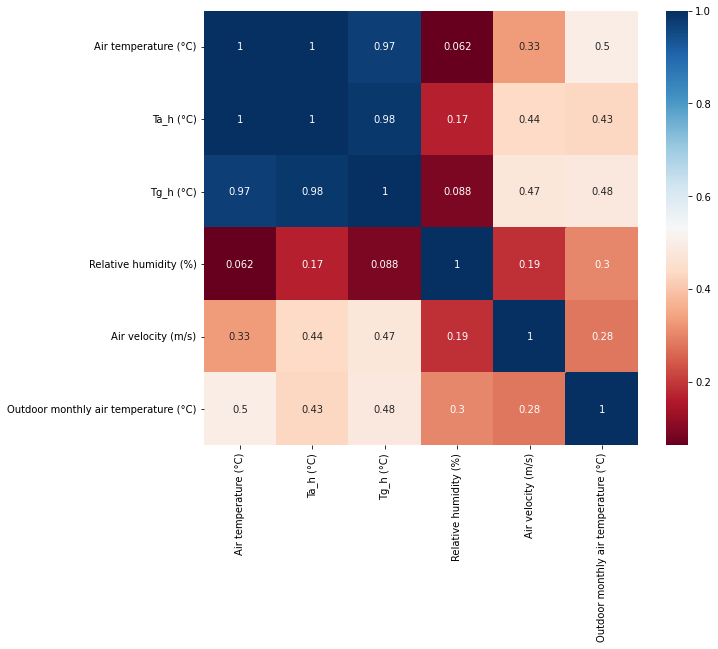

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = corr_matrix
sns.heatmap(corr, annot=True, mask=np.zeros_like(corr, dtype=np.bool), cmap="RdBu",
            square=True, ax=ax)

Air temperature, Ta_h, Tg_h 는 상관성이 0.97로 매우 높다. -> 결측비율이 가장 낮은 Air temperature로 통합함

In [ ]:
val = list(data.columns.values)
print(val)
print(len(val))

['Season', 'Climate', 'Country', 'Thermal preference', 'Air temperature (°C)', 'Ta_h (°C)', 'Tg_h (°C)', 'Relative humidity (%)', 'Air velocity (m/s)', 'Outdoor monthly air temperature (°C)']
10


결측치 수 합계

In [ ]:
data.isnull().sum()

Season                                     85
Climate                                     0
Country                                     0
Thermal preference                      16126
Air temperature (°C)                     2174
Ta_h (°C)                               30365
Tg_h (°C)                               27506
Relative humidity (%)                    7635
Air velocity (m/s)                          0
Outdoor monthly air temperature (°C)     2161
dtype: int64

In [22]:
data.isnull().sum()/len(data)

Season                                  0.001857
Climate                                 0.000000
Country                                 0.000000
Thermal preference                      0.352342
Air temperature (°C)                    0.047500
Relative humidity (%)                   0.166820
Air velocity (m/s)                      0.000000
Outdoor monthly air temperature (°C)    0.047216
dtype: float64

## MRT, Tg_h, Globe temperature, Ta_h 의 처리



*  **MRT(Mean Radiant Temperature) 는 Tg_h, Globe temperature 로 대체**

tg = 0.5 tmr + 0.5 ta                           

where

tg = globe (resultant) temperature (oC, oF)

tmr = mean radiation temperature (oC, oF)

ta = air temperature (oC, oF)

mrt =2*Tg_h - Ta_h


- Ta_h 와 Tg_h 는 거의 같은 변수


In [21]:
data = data.drop(['Ta_h (°C)','Tg_h (°C)'],axis =1)


- Ta_h, Tg_h 변수 삭제


- nan 값 제거

In [ ]:
data_fin = data.dropna(axis=0)

In [ ]:
data_fin.isnull().sum()/len(data)

Season                                  0.0
Climate                                 0.0
Country                                 0.0
Thermal preference                      0.0
Air temperature (°C)                    0.0
Relative humidity (%)                   0.0
Air velocity (m/s)                      0.0
Outdoor monthly air temperature (°C)    0.0
dtype: float64

In [ ]:
data_fin.columns

Index(['Season', 'Climate', 'Country', 'Thermal preference',
       'Air temperature (°C)', 'Relative humidity (%)', 'Air velocity (m/s)',
       'Outdoor monthly air temperature (°C)'],
      dtype='object')

In [ ]:
data_fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25292 entries, 0 to 45767
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Season                                25292 non-null  object 
 1   Climate                               25292 non-null  object 
 2   Country                               25292 non-null  object 
 3   Thermal preference                    25292 non-null  object 
 4   Air temperature (°C)                  25292 non-null  float64
 5   Relative humidity (%)                 25292 non-null  float64
 6   Air velocity (m/s)                    25292 non-null  float64
 7   Outdoor monthly air temperature (°C)  25292 non-null  float64
dtypes: float64(4), object(4)
memory usage: 1.7+ MB


총 25292 개의 데이터


* Thermal preference 범주형 데이터를 -1,0,1 의 정수형 데이터로 대체했다.

cold, cooler -> 1

ok, no change -> 0

warmer -> -1

In [ ]:
data_fin['Thermal preference'] = np.where(data_fin['Thermal preference']=='cold',1,data_fin['Thermal preference'])
data_fin['Thermal preference'] = np.where(data_fin['Thermal preference']=='cooler',1,data_fin['Thermal preference'])
data_fin['Thermal preference'] = np.where(data_fin['Thermal preference']=='ok',0,data_fin['Thermal preference'])
data_fin['Thermal preference'] = np.where(data_fin['Thermal preference']=='no change',0,data_fin['Thermal preference'])
data_fin['Thermal preference'] = np.where(data_fin['Thermal preference']=='warmer',-1,data_fin['Thermal preference'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
data_fin['Thermal preference'].unique()

array([-1, 0, 1], dtype=object)

* object 형을 int 형으로 바꿔주기

In [ ]:
data_fin = data_fin.astype({'Thermal preference':int})

## 데이터 상관관계 분석

1에 가까울수록 강한 양의 상관관계

In [ ]:
corr_matrix = data_fin.corr()

In [ ]:
corr_matrix['Thermal preference'].sort_values(ascending=False)

Thermal preference                      1.000000
Air temperature (°C)                    0.250663
Outdoor monthly air temperature (°C)    0.157134
Air velocity (m/s)                      0.126050
Relative humidity (%)                   0.074112
Name: Thermal preference, dtype: float64

In [ ]:
corr_matrix['Air temperature (°C)'].sort_values(ascending=False)

Air temperature (°C)                    1.000000
Outdoor monthly air temperature (°C)    0.534215
Air velocity (m/s)                      0.307442
Thermal preference                      0.250663
Relative humidity (%)                   0.083627
Name: Air temperature (°C), dtype: float64

Air Temperature 와 상관성이 높은 변수 -> MRT, Outdoor monthly temperature

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


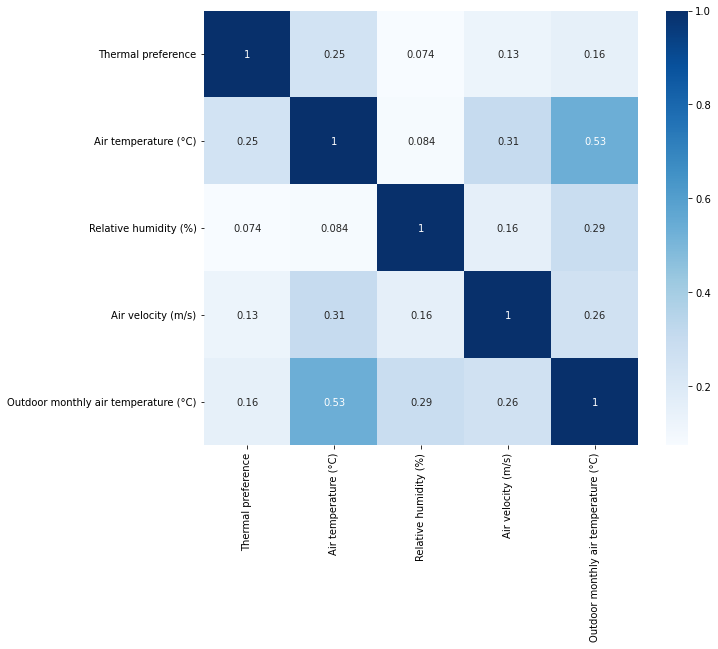

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = corr_matrix
sns.heatmap(corr, annot=True, mask=np.zeros_like(corr, dtype=np.bool), cmap="Blues",
            square=True, ax=ax)

## 데이터 x,y로 나누기

* parameter 변수를 x에 저장, 예측하고자 하는 thermal preference 를 y에 저장

* country, thermal comfort, Air movement preference 삭제

In [ ]:
features = ['Season', 'Climate', 'Country', 
'Air temperature (°C)', 'Relative humidity (%)',
'Air velocity (m/s)', 'Outdoor monthly air temperature (°C)']
target = ['Thermal preference']

In [ ]:
x = data_fin[features]
y = data_fin[target]

In [ ]:
x.describe() #독립변수(feature)의 기초통계량

,Air temperature (°C),Relative humidity (%),Air velocity (m/s),Outdoor monthly air temperature (°C)
count,25292.000000,25292.000000,25292.000000,25292.000000
mean,25.192472,51.459443,0.126275,22.476119
std,3.490744,14.830244,0.129545,8.453571
min,6.200000,0.400000,0.000000,-16.800000
25%,23.100000,41.000000,0.030000,18.500000
50%,25.100000,51.500000,0.100000,23.000000
75%,27.200000,63.060000,0.200000,29.700000
max,37.600000,95.300000,1.400000,37.700000


In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25292 entries, 0 to 45767
Data columns (total 7 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Season                                25292 non-null  object 
 1   Climate                               25292 non-null  object 
 2   Country                               25292 non-null  object 
 3   Air temperature (°C)                  25292 non-null  float64
 4   Relative humidity (%)                 25292 non-null  float64
 5   Air velocity (m/s)                    25292 non-null  float64
 6   Outdoor monthly air temperature (°C)  25292 non-null  float64
dtypes: float64(4), object(3)
memory usage: 1.5+ MB


In [ ]:
y=y.astype('int')

In [ ]:
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25292 entries, 0 to 45767
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Thermal preference  25292 non-null  int64
dtypes: int64(1)
memory usage: 395.2 KB


In [ ]:
x.columns

Index(['Season', 'Climate', 'Country', 'Air temperature (°C)',
       'Relative humidity (%)', 'Air velocity (m/s)',
       'Outdoor monthly air temperature (°C)'],
      dtype='object')

# Normalization

모든 데이터 포인트가 동일한 정도의 스케일(중요도)로 반영되도록 해준다.

이 데이터에서는 float형인 Air temperature, Relative Humidity, Air velocityy,Outdoor monthly temperature 변수에 대해 z-score normalization 을 진행하였다.

z-score normalization: 이상치 문제를 피하는 데이터 정규화 전략, 평균:0, 표준편차:1

In [ ]:
float_features = [
'Air temperature (°C)', 'Relative humidity (%)',
'Air velocity (m/s)', 'Outdoor monthly air temperature (°C)']
obj_features =['Season', 'Climate', 'Country']

x_float = data_fin[float_features]
x_obj= data_fin[obj_features]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
x_float_norm = scaler.fit_transform(x_float)
x_float_norm = pd.DataFrame(x_float_norm,columns=x_float.columns,index=x_float.index)
x_float_norm

,Air temperature (°C),Relative humidity (%),Air velocity (m/s),Outdoor monthly air temperature (°C)
0,-0.284321,-0.084926,-0.511608,0.298564
1,-0.284321,-0.084926,-0.511608,0.298564
2,-0.284321,-0.084926,-0.511608,0.298564
3,-0.284321,-0.084926,-0.511608,0.298564
4,-0.284321,-0.084926,-0.511608,0.298564
...,...,...,...,...
45763,-0.565069,1.407325,-0.202828,-0.529505
45764,-0.516368,1.073541,-0.202828,-0.529505
45765,-0.619500,1.073541,-0.202828,-0.529505
45766,-0.530692,1.192894,-0.202828,-0.529505


# Categorical Encoding

범주형 데이터는 Season , Climate, Country이다. 이들은 모두 순서가 없는 명목형 변수이다. 

텍스트 등으로 구성된 범주형 변수를 모델링에 사용할 수 있게 Categorical encoding을 진행했다.

## Binary Encoding
* 카테고리에 대한 오더를 부여한 다음 바이너리로 바꾸고,이를 다시 원핫 인코딩의 방식으로 찢는 방식이다. 
* 원핫 인코딩의 방식을 취하면서 변수의 개수를 줄일 수 있다. 
* 많은 정보를 잃지  않고 One-Hot 인코딩보다 차원이 감소된 인코딩된 데이터를 얻을 수 있다.
* 카테고리가 많은 데이터의 경우 매우 유용하다. 

In [ ]:
pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 80 kB 3.5 MB/s 


In [ ]:
import category_encoders as ce
import pandas as pd
encoder = ce.BinaryEncoder(cols=obj_features,return_df=True)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data_fin_encoded = encoder.fit_transform(x_obj)

In [ ]:
data_fin_encoded

,Season_0,Season_1,Season_2,Climate_0,Climate_1,Climate_2,Climate_3,Country_0,Country_1,Country_2,Country_3
0,0,0,1,0,0,0,1,0,0,0,1
1,0,0,1,0,0,0,1,0,0,0,1
2,0,0,1,0,0,0,1,0,0,0,1
3,0,0,1,0,0,0,1,0,0,0,1
4,0,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
45763,1,0,0,0,0,0,1,1,0,0,1
45764,1,0,0,0,0,0,1,1,0,0,1
45765,1,0,0,0,0,0,1,1,0,0,1
45766,1,0,0,0,0,0,1,1,0,0,1


In [ ]:
x_all = pd.concat([data_fin_encoded,x_float_norm ],axis=1)
x_all

,Season_0,Season_1,Season_2,Climate_0,Climate_1,Climate_2,Climate_3,Country_0,Country_1,Country_2,Country_3,Air temperature (°C),Relative humidity (%),Air velocity (m/s),Outdoor monthly air temperature (°C)
0,0,0,1,0,0,0,1,0,0,0,1,-0.284321,-0.084926,-0.511608,0.298564
1,0,0,1,0,0,0,1,0,0,0,1,-0.284321,-0.084926,-0.511608,0.298564
2,0,0,1,0,0,0,1,0,0,0,1,-0.284321,-0.084926,-0.511608,0.298564
3,0,0,1,0,0,0,1,0,0,0,1,-0.284321,-0.084926,-0.511608,0.298564
4,0,0,1,0,0,0,1,0,0,0,1,-0.284321,-0.084926,-0.511608,0.298564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45763,1,0,0,0,0,0,1,1,0,0,1,-0.565069,1.407325,-0.202828,-0.529505
45764,1,0,0,0,0,0,1,1,0,0,1,-0.516368,1.073541,-0.202828,-0.529505
45765,1,0,0,0,0,0,1,1,0,0,1,-0.619500,1.073541,-0.202828,-0.529505
45766,1,0,0,0,0,0,1,1,0,0,1,-0.530692,1.192894,-0.202828,-0.529505


# 상관관계(correlation 파악)

In [ ]:
corr_matrix = x_all.corr()

In [ ]:
corr_matrix

,Season_0,Season_1,Season_2,Climate_0,Climate_1,Climate_2,Climate_3,Country_0,Country_1,Country_2,Country_3,Air temperature (°C),Relative humidity (%),Air velocity (m/s),Outdoor monthly air temperature (°C)
Season_0,1.000000,-0.447837,-0.671880,-0.198397,0.014585,0.028876,0.041498,-0.044878,-0.114651,0.122021,0.006107,0.135163,-0.150282,0.212096,0.155253
Season_1,-0.447837,1.000000,0.080640,-0.007751,0.013903,-0.126083,-0.072277,0.105809,-0.100115,0.018997,-0.044052,-0.317130,-0.107249,-0.177244,-0.383799
Season_2,-0.671880,0.080640,1.000000,0.270552,-0.059959,0.049820,0.026268,0.016898,0.154776,-0.119050,0.026080,-0.113440,0.054092,-0.109569,-0.169457
Climate_0,-0.198397,-0.007751,0.270552,1.000000,0.001370,-0.174756,-0.307388,0.349855,0.170749,-0.055239,-0.210938,-0.103882,0.042289,0.012318,-0.227391
Climate_1,0.014585,0.013903,-0.059959,0.001370,1.000000,-0.256872,-0.201784,0.163807,0.475776,0.147417,-0.680849,-0.071070,-0.205792,-0.183521,-0.469275
Climate_2,0.028876,-0.126083,0.049820,-0.174756,-0.256872,1.000000,0.002940,-0.580400,-0.343102,0.613874,0.446246,0.155014,-0.229429,-0.059160,0.358367
Climate_3,0.041498,-0.072277,0.026268,-0.307388,-0.201784,0.002940,1.000000,0.032099,0.113619,-0.249537,0.209593,-0.022718,0.053458,0.009866,-0.001658
Country_0,-0.044878,0.105809,0.016898,0.349855,0.163807,-0.580400,0.032099,1.000000,0.247762,-0.668857,-0.192683,-0.119390,0.189645,0.185636,-0.275125
Country_1,-0.114651,-0.100115,0.154776,0.170749,0.475776,-0.343102,0.113619,0.247762,1.000000,-0.288446,-0.510649,-0.057297,-0.012443,-0.047092,-0.244909
Country_2,0.122021,0.018997,-0.119050,-0.055239,0.147417,0.613874,-0.249537,-0.668857,-0.288446,1.000000,-0.075110,0.138619,-0.350536,-0.126720,0.076876


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


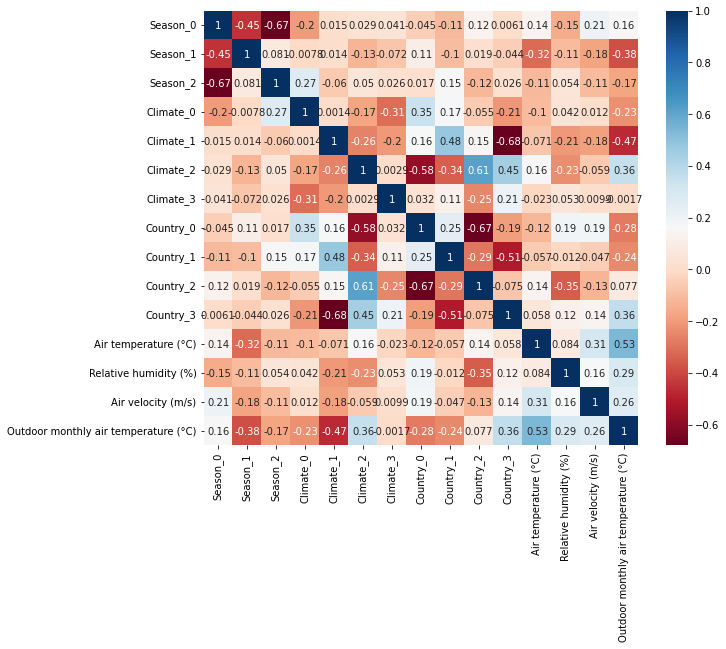

In [ ]:
f, ax = plt.subplots(figsize=(10, 8))
corr = corr_matrix
sns.heatmap(corr, annot=True, mask=np.zeros_like(corr, dtype=np.bool), cmap="RdBu",
            square=True, ax=ax)

# Data Sampling

In [ ]:
print(y.value_counts())

Thermal preference
 0                    13999
 1                     7947
-1                     3346
dtype: int64


 - y값의 분포가 imbalanced 한 데이터셋이다.

    - 0(ok, no change): 13999
    - 1(cold,cooler): 7947
    - -1(warmer) : 3346
 
 - 일반적으로, 분류 문제에서 target 변수(Y)의 클래스들이 imbalanced한 문제를 해결하기 위해 샘플링을 진행
 

## Oversampling 

### ADASYN

이 방법은 SMOTE와 유사하지만 오버샘플링할 클래스의 로컬 분포 추정값에 따라 다른 수의 샘플을 생성한다. 

In [ ]:
from imblearn.over_sampling import ADASYN 
ada = ADASYN(random_state=22, sampling_strategy='all') 
x_ada, y_ada = ada.fit_resample(x_all,y)
print(y_ada.value_counts())

Thermal preference
 1                    14202
 0                    13999
-1                    13626
dtype: int64


### SMOTENC

In [ ]:
from imblearn.over_sampling import SMOTENC
x_smo,y_smo = SMOTENC(categorical_features=[0,10]).fit_resample(x_all,y)
print(y_smo.value_counts())

Thermal preference
-1                    13999
 0                    13999
 1                    13999
dtype: int64


### BorderlineSMOTE

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE
bsmote = BorderlineSMOTE(random_state=42)
x_bsmo, y_bsmo = bsmote.fit_resample(x_all,y)
print(y_bsmo.value_counts())

Thermal preference
-1                    13999
 0                    13999
 1                    13999
dtype: int64


# Data Partitioning

데이터를 모두 학습시킨 상태로 결과를 예측할경우 과도하게 학습되는 overfit이 발생한다. 따라서 이를 방지하기 위해 train과 test셋으로 나누어 train셋은 모델을 학습할때 사용하고 test셋으로 최종 모델의 성능을 측정하여 과적합을 방지하였다.

- 모델을 제대로 구축한 것인지 그 성능을 확인하고, overfitting을 방지하기 위함
- 데이터셋을 train(0.6), valid(0.2), test set(0.2)으로 구분
  - train set: 모델을 학습할 때 사용
  - valid set: 최적 모델을 찾기 위해 모델의 하이퍼파라미터 튜닝 시 활용
  - test set: 최종 모델의 성능 측정 시 사용
---

- *test set 사용시 가짜 데이터는 삭제해야함*

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_all, y, train_size=0.8, test_size=0.2, random_state=77)

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, 
    test_size=0.25, random_state= 8,stratify=y_train)

In [ ]:
print("train set:",x_train.shape)
print("valid set:",x_val.shape)
print("test set:",x_test.shape)

train set: (15174, 15)
valid set: (5059, 15)
test set: (5059, 15)


# PCA (차원축소)

In [ ]:
!pip install factor_analyzer # https://pypi.org/project/factor-analyzer/

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41 kB 299 kB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.4.0-py3-none-any.whl size=41455 sha256=3680cdf4ac88a5b2d6c57870a10fc7f8bafd6f99a11bc8b45cde88640e23500a
  Stored in directory: /root/.cache/pip/wheels/ac/00/37/1f0e8a5039f9e9f207c4405bbce0796f07701eb377bfc6cc76
Successfully built factor-analyzer


In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA

# 필요한 패키지/모듈 가져오기
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline

from factor_analyzer import FactorAnalyzer

In [ ]:
x_all.cov()

,Season_0,Season_1,Season_2,Climate_0,Climate_1,Climate_2,Climate_3,Country_0,Country_1,Country_2,Country_3,Air temperature (°C),Relative humidity (%),Air velocity (m/s),Outdoor monthly air temperature (°C)
Season_0,0.128284,-0.080060,-0.108381,-0.031205,0.002022,0.005154,0.007151,-0.007553,-0.017214,0.021052,0.000883,0.048412,-0.053827,0.075967,0.055608
Season_1,-0.080060,0.249123,0.018127,-0.001699,0.002685,-0.031362,-0.017357,0.024817,-0.020947,0.004567,-0.008871,-0.158290,-0.053531,-0.088468,-0.191567
Season_2,-0.108381,0.018127,0.202839,0.053509,-0.010450,0.011182,0.005692,0.003576,0.029222,-0.025827,0.004739,-0.051092,0.024362,-0.049348,-0.076321
Climate_0,-0.031205,-0.001699,0.053509,0.192845,0.000233,-0.038244,-0.064946,0.072196,0.031433,-0.011685,-0.037375,-0.045620,0.018571,0.005410,-0.099859
Climate_1,0.002022,0.002685,-0.010450,0.000233,0.149757,-0.049539,-0.037570,0.029788,0.077183,0.027479,-0.106309,-0.027504,-0.079640,-0.071021,-0.181605
Climate_2,0.005154,-0.031362,0.011182,-0.038244,-0.049539,0.248351,0.000705,-0.135919,-0.071677,0.147359,0.089729,0.077252,-0.114338,-0.029483,0.178595
Climate_3,0.007151,-0.017357,0.005692,-0.064946,-0.037570,0.000705,0.231489,0.007257,0.022916,-0.057832,0.040688,-0.010931,0.025721,0.004747,-0.000798
Country_0,-0.007553,0.024817,0.003576,0.072196,0.029788,-0.135919,0.007257,0.220821,0.048807,-0.151398,-0.036533,-0.056104,0.089119,0.087235,-0.129288
Country_1,-0.017214,-0.020947,0.029222,0.031433,0.077183,-0.071677,0.022916,0.048807,0.175731,-0.058244,-0.086372,-0.024019,-0.005216,-0.019742,-0.102668
Country_2,0.021052,0.004567,-0.025827,-0.011685,0.027479,0.147359,-0.057832,-0.151398,-0.058244,0.232023,-0.014598,0.066772,-0.168852,-0.061040,0.037031


In [ ]:
pca = PCA(random_state=312)
X_p = pca.fit_transform(x_all)

### Step1. 적합한 PC의 개수 찾기
1. Eigen value가 1 이상일 때까지

In [ ]:
fa = FactorAnalyzer(n_factors=x_all.shape[1], rotation=None) # rotation: 
fa.fit(x_all)

ev, v = fa.get_eigenvalues()
print('eigen value:', ev,'\n')

print('적합한 PC 개수:', sum(ev >= 1))

eigen value: [3.37511237 2.3221404  2.06058915 1.47268904 1.2494052  0.94344265
 0.84246149 0.59345292 0.52429419 0.46966571 0.42114444 0.29286881
 0.19945377 0.13966253 0.09361732] 

적합한 PC 개수: 5


2. Scree plot 그래프 기울기가 완만해지기 전까지

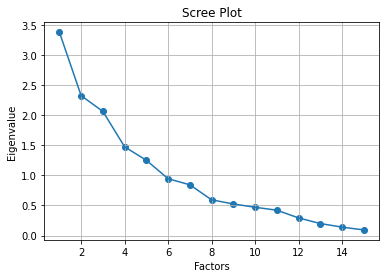

In [ ]:
plt.scatter(range(1, x_all.shape[1]+1),ev)
plt.plot(range(1,x_all.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

- Factors가 (5 -> 6) 이후로 (6 -> 87)에서 기울기가 완만해지는 것을 보임
  - 따라서 기울기가 완만해지기 전의 값으로, 적합한 PC 개수는 5

### Step2. PCA 진행

In [ ]:
pca = PCA(n_components=5,random_state=312) # n_components를 재설정
pca_out = pca.fit(x_all)
X_p = pca.fit_transform(x_all)

In [ ]:
pd.DataFrame(pca.components_.T, 
             columns = ['PC1','PC2','PC3','PC4','PC5'], 
             index=x_all.columns)

,PC1,PC2,PC3,PC4,PC5
Season_0,-0.052966,-0.074754,0.085087,-0.057289,0.312367
Season_1,0.154234,0.044481,0.008906,-0.053593,-0.314713
Season_2,0.055781,0.064542,-0.044907,0.047363,-0.343395
Climate_0,0.053222,0.092051,0.074345,0.117205,-0.278521
Climate_1,0.109806,-0.021226,0.093836,0.261946,0.011501
Climate_2,-0.078413,-0.275688,-0.145291,-0.266579,-0.261593
Climate_3,-0.009092,0.043670,-0.020338,-0.068648,0.427872
Country_0,0.042784,0.250488,0.181836,0.166738,0.199758
Country_1,0.061773,0.076972,0.083848,0.246594,0.185004
Country_2,-0.000810,-0.298167,-0.054755,-0.078600,-0.393122


In [ ]:
X_pp = pd.DataFrame(X_p, 
                    columns = ['PC1','PC2','PC3','PC4','PC5'], 
                    index = x_all.index)
X_pp

,PC1,PC2,PC3,PC4,PC5
0,0.112106,0.102878,-0.560334,-0.131839,0.722061
1,0.112106,0.102878,-0.560334,-0.131839,0.722061
2,0.112106,0.102878,-0.560334,-0.131839,0.722061
3,0.112106,0.102878,-0.560334,-0.131839,0.722061
4,0.112106,0.102878,-0.560334,-0.131839,0.722061
...,...,...,...,...,...
45763,0.121854,1.630582,-0.325562,-0.011412,1.074416
45764,0.196777,1.361993,-0.189537,-0.010849,1.138321
45765,0.252979,1.393945,-0.199721,-0.081042,1.150837
45766,0.168302,1.457076,-0.237871,-0.008947,1.115095


### Step3. Plot

 score plot
  - 주성분 (PC1과 PC2)과 원데이터 간 관계를 보여주는 그래프

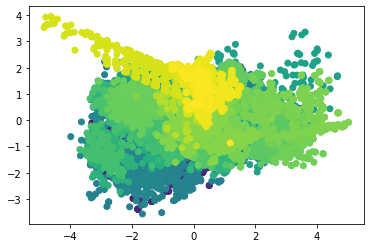

In [ ]:
# Principal Component Pattern Plot 1
plt.scatter(x=X_pp['PC1'],y=X_pp['PC2'], c=X_pp.index) # c: class/cluster 구분이 있는 경우 class/cluster로 설정하여 색깔에 따라 class/cluster 확인

## Factor Analysis

- PCA와 마찬가지로, 요인 분석 (Factor analysis) 후에는 더 적은 차원의 변수들로 차원 축소
  - 차원을 축소함으로써 자료를 요약할 수 있고, 변인들이 공통 요인으로 묶일 수 있는지와 상호관계를 판단할 수 있으며, 불필요한 변수를 제거할 수 있음

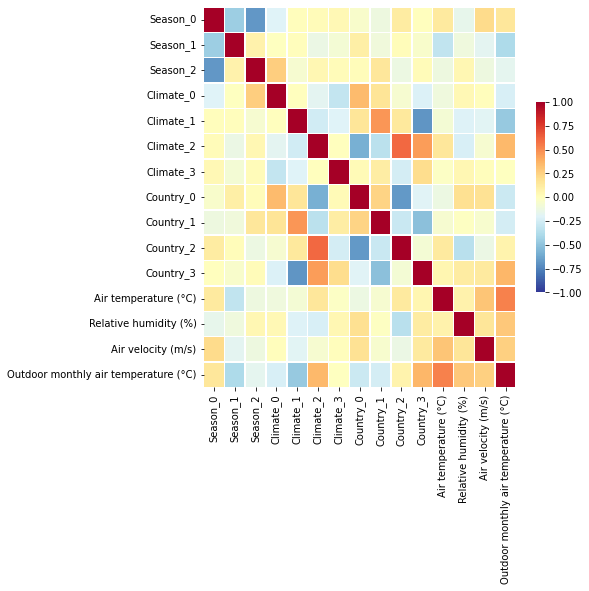

In [ ]:
fig, ax = plt.subplots( figsize=(7,7) )
sns.heatmap(x_all.corr(), 
            cmap = 'RdYlBu_r', 
            # annot = True,   # 실제 값을 표시한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

# Classification Model

Classification Algorithms (분류 알고리즘)

- Logistic Regression (Logit Regression)
- Support Vector Machine (SVM)
- Random Forest
- Decision Tree
- Gradient Boosting Tree (GBT)
- SGD Classifier
- AdaBoost

# Logistic Regression

- 로지스틱 회귀는 시그모이드 함수를 활용해 타깃값에 포함될 확률을 예측한다. 
- 종속변수(y)가 -1,0,1 로 multi 형태이므로 다항 로지스틱 회귀이다.
- 다중공산성 확인(vif)
  - 기본적으로 회귀분석의 전제는 독립변수들로 변수를 설정해야한다는 것이다. 다중 공산성이 있다는 것은 변수들 간의 상관관계가 높다는 것을 의미한다. 기존 전제가 무너진 것이기 때문에 다중공산성을 없애기 위한 노력이 필요하다.

다중공산성 확인(vif)

In [ ]:
x_train.drop(columns = ['Season_0','Climate_0','Country_0'],inplace =True)
x_test.drop(columns = ['Season_0','Climate_0','Country_0'],inplace =True)
x_val.drop(columns = ['Season_0','Climate_0','Country_0'],inplace =True)

In [ ]:
# Use variance inflation factor to identify any significant multi-collinearity
def calc_vif(x_train):
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    vif = pd.DataFrame()
    vif["variables"] = x_train.columns
    vif["VIF"] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
    return(vif)

calc_vif(x_train)

,variables,VIF
0,Season_1,2.544716
1,Season_2,3.651812
2,Climate_1,2.692008
3,Climate_2,6.173196
4,Climate_3,3.010538
5,Country_1,2.243634
6,Country_2,5.585802
7,Country_3,6.565759
8,Air temperature (°C),1.646582
9,Relative humidity (%),1.373545


vif 가 10이상인 변수들이 없음 -> 다중공산성이 없음(변수들 간 상관관계가 높지 않음) 

따라서 logistic regression 을 쓰기에 적합한 데이터셋이다. 

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train.values.ravel())
predict_lin = model.predict(x_test)

print(model.score(x_train,y_train))
print(model.score(x_val,y_val))
print(model.score(x_test,y_test))


0.5983260840912087
0.5880608815971536
0.604862621071358


In [ ]:
import statsmodels.api as sm
x_train = sm.add_constant(x_train)
x_val = sm.add_constant(x_val)
x_test = sm.add_constant(x_test)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')

In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
# define the model evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(model, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report the model performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.597 (0.008)


In [ ]:

# define the multinomial logistic regression model
LogiRe = LogisticRegression(multi_class='multinomial', solver='newton-cg')
# fit the model on the whole dataset
LogiRe.fit(x_train, y_train)

yhat = LogiRe.predict_proba(x_train)
# summarize the predicted probabilities
print('Predicted Probabilities: %s' % yhat[0])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Predicted Probabilities: [0.13988062 0.66612401 0.19399537]


### Evaluation

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report

In [ ]:
y_pred_train_logi = LogiRe.predict(x_train)
y_pred_test_logi = LogiRe.predict(x_test)
print(classification_report(y_test,y_pred_test_logi))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       680
           0       0.61      0.91      0.73      2845
           1       0.57      0.30      0.40      1534

    accuracy                           0.60      5059
   macro avg       0.39      0.40      0.37      5059
weighted avg       0.52      0.60      0.53      5059



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('Mean Accuracy of Logistic Regression on test set: %.4f' %LogiRe.score(x_test,y_test))
print('Mean Accuracy of Logistic Regression on val set: %.4f' %LogiRe.score(x_val,y_val))
print('Mean Accuracy of Logistic Regression on train set: %.4f' %LogiRe.score(x_train,y_train))

Mean Accuracy of Logistic Regression on test set: 0.6017
Mean Accuracy of Logistic Regression on val set: 0.5859
Mean Accuracy of Logistic Regression on train set: 0.5928


In [ ]:
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores, mean(scores)

In [ ]:
evaluate_model(LogiRe, x_test,y_test)

(array([0.59090909, 0.58300395, 0.60671937, 0.61264822, 0.59288538,
        0.60079051, 0.59486166, 0.58300395, 0.6027668 , 0.60594059,
        0.61462451, 0.62450593, 0.58695652, 0.59683794, 0.59288538,
        0.61067194, 0.57312253, 0.59881423, 0.59288538, 0.6039604 ,
        0.57905138, 0.59288538, 0.61857708, 0.61067194, 0.60869565,
        0.58893281, 0.61067194, 0.61660079, 0.56916996, 0.6       ]),
 0.5988017062575824)

### GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
logistic = LogisticRegression()

lr_params = {'C':[0.1,0.125,0.2],'max_iter':[800,900,1000],'solver':['liblinear'],'random_state':[42]}

gridsearch_logimodel = GridSearchCV(estimator = logistic, param_grid = lr_params,scoring='roc_auc',cv=5)

gridsearch_logimodel.fit(x_train,y_train)

print('최적 파라미터:',gridsearch_logimodel.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  Use

최적 파라미터: {'C': 0.1, 'max_iter': 800, 'random_state': 42, 'solver': 'liblinear'}


In [ ]:
print(gridsearch_logimodel.best_estimator_)

LogisticRegression(C=0.1, max_iter=800, random_state=42, solver='liblinear')


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=0.1, max_iter=800, random_state=42, solver='liblinear')
model.fit(x_train, y_train.values.ravel())
predict_lin = model.predict(x_test)

print(model.score(x_train,y_train))
print(model.score(x_val,y_val))
print(model.score(x_test,y_test))

0.5933834190061948
0.5831191935165052
0.5995255979442577


# Support Vector Machine

- 선형 데이터, 비선형 데이터 모두에 적용할 수 있는 모델이다.
- 데이터들을 분류하기 위한 Decision Boundary(최적 경계선; 위 그림에서 파선)을 찾고,
  분류할 데이터가 입력되었을 때, 해당 데이터가 경계선의 어느 쪽에 위치하는지를 판별해낸다.
- Multi class SVM 이용
- parameter: gamma, C

In [ ]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15174 entries, 17989 to 33979
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Thermal preference  15174 non-null  int64
dtypes: int64(1)
memory usage: 237.1 KB


In [ ]:
from sklearn import svm
from sklearn.svm import SVC
import sklearn.metrics as mt
from sklearn.model_selection import cross_val_score, cross_validate 
from sklearn.metrics import confusion_matrix, classification_report

accuracy1=[] 

svm1 = svm.SVC(C=1,kernel='rbf', gamma=0.84,   ###Cost and gamma can be modified
                        decision_function_shape='ovo',random_state=0) 
svm1.fit(x_train, y_train)
accuracy1.append(svm1.score(x_test,y_test))   
y_pred=svm1.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy1)
            

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[ 142  436  102]
 [  69 2380  396]
 [  11  780  743]]
[0.6453844633326744]


In [ ]:
y_pred_test_svm = svm.predict(x_test)
print(classification_report(y_test, y_pred_test_svm))

              precision    recall  f1-score   support

          -1       0.68      0.11      0.19       420
           0       0.62      0.82      0.70      1656
           1       0.58      0.47      0.52       992

    accuracy                           0.61      3068
   macro avg       0.63      0.47      0.47      3068
weighted avg       0.61      0.61      0.57      3068



### GridsearchCV 

아래 시간 개오래걸림..

In [ ]:
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.606 total time=   7.7s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.592 total time=   4.7s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.609 total time=   4.7s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.588 total time=   4.7s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.590 total time=   4.7s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.625 total time=   4.4s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.591 total time=   4.4s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.597 total time=   4.4s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.587 total time=   4.4s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.601 total time=   6.6s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.550 total time=   8.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.547 total time=   6.9s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.554 total time=   6.6s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.547 total time=   4.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.553 total time=   4.4s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.538 total time=   4.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.538 total time=   4.2s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.538 total time=   4.2s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.538 total time=   4.2s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.538 total time=   5.6s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.538 total time=   4.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.538 total time=   4.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.538 total time=   4.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.538 total time=   4.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.538 total time=   4.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.632 total time=   5.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.614 total time=   5.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.623 total time=   5.2s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.603 total time=   5.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.607 total time=   5.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.639 total time=   4.9s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.616 total time=   4.8s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.620 total time=   5.8s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.597 total time=   4.9s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.613 total time=   4.9s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.609 total time=   4.6s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.587 total time=   4.6s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.591 total time=   4.6s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.586 total time=   4.6s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.589 total time=   4.7s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.538 total time=   4.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.538 total time=   4.3s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.538 total time=   4.4s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.539 total time=   4.4s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.539 total time=   4.3s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.538 total time=   4.2s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.538 total time=   4.3s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.538 total time=   4.4s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.538 total time=   4.3s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.538 total time=   4.2s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .........C=10, gamma=1, kernel=rbf;, score=0.613 total time=   6.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .........C=10, gamma=1, kernel=rbf;, score=0.606 total time=   6.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .........C=10, gamma=1, kernel=rbf;, score=0.609 total time=   6.2s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .........C=10, gamma=1, kernel=rbf;, score=0.603 total time=   6.2s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .........C=10, gamma=1, kernel=rbf;, score=0.606 total time=  10.4s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.641 total time=   7.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.613 total time=   6.4s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.628 total time=   6.4s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.600 total time=   6.7s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.615 total time=   6.2s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.617 total time=   5.2s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.590 total time=   5.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.611 total time=   5.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.584 total time=   5.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.599 total time=   5.3s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.574 total time=   5.2s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.566 total time=   5.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.571 total time=   5.2s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.564 total time=   5.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.570 total time=   5.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.538 total time=   4.2s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.538 total time=   4.4s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.538 total time=   4.3s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.538 total time=   4.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.538 total time=   4.4s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ........C=100, gamma=1, kernel=rbf;, score=0.608 total time=  11.7s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ........C=100, gamma=1, kernel=rbf;, score=0.614 total time=  11.3s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ........C=100, gamma=1, kernel=rbf;, score=0.586 total time=  18.8s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ........C=100, gamma=1, kernel=rbf;, score=0.586 total time=  12.6s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ........C=100, gamma=1, kernel=rbf;, score=0.576 total time=  10.8s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.639 total time=  11.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.615 total time=  12.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.621 total time=  17.8s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.602 total time=  20.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.613 total time=  19.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.637 total time=  16.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.604 total time=  12.4s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.616 total time=   9.8s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.598 total time=  10.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.609 total time=   9.2s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.600 total time=   5.9s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.584 total time=   5.6s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.594 total time=   5.9s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.583 total time=   5.3s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.585 total time=   5.7s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.547 total time=   5.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.565 total time=   5.2s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.569 total time=   7.8s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.564 total time=   5.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.568 total time=   5.4s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.580 total time=  45.3s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.590 total time=  40.6s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.573 total time=  41.9s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.576 total time=  45.2s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.560 total time=  45.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.618 total time=  42.7s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.616 total time=  43.8s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.626 total time=  52.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.596 total time=  54.9s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.612 total time=  39.9s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.639 total time=  26.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.608 total time=  30.7s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.619 total time=  30.9s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.590 total time=  39.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.609 total time=  29.4s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.611 total time=  10.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.585 total time=   9.9s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.609 total time=  10.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.580 total time=  10.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.590 total time=   9.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.565 total time=   7.3s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.568 total time=   7.2s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.577 total time=   7.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.567 total time=   7.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.570 total time=   7.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)


{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=10, gamma=0.1)


svm2: gridsearch 를 통해 찾은 최적의 hyperparameter 사용한 것

In [ ]:
from sklearn import svm
from sklearn.svm import SVC

accuracy_cv=[] 

svm2 = svm.SVC(C=10,kernel='rbf', gamma=0.1,   ###Cost and gamma can be modified
                        decision_function_shape='ovo',random_state=0) 
svm2.fit(x_train, y_train)
accuracy_cv.append(svm2.score(x_test,y_test))   
y_pred=svm2.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_cv)
            

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[ 118  470   92]
 [  48 2431  366]
 [   5  860  669]]
[0.6360940897410555]


In [ ]:
y_pred_test_svm = svm2.predict(x_test)
print(classification_report(y_test, y_pred_test_svm))

              precision    recall  f1-score   support

          -1       0.69      0.17      0.28       680
           0       0.65      0.85      0.74      2845
           1       0.59      0.44      0.50      1534

    accuracy                           0.64      5059
   macro avg       0.64      0.49      0.51      5059
weighted avg       0.64      0.64      0.60      5059



### K-Fold 교차 검증 
랜덤하게 뽑아낸 test set이 그저 운이 좋았다는 것을 방지하기 위해 실행한다. 기존 train, validation, test 3개의 집단으로 분류한 것보다, train 과 test으로만 분류할 때 학습 데이터 셋이 더 많기 때문이다.

 train set을 k개의 fold로 나눈뒤, 한개의 fold에 있는 데이터를 다시 k개로 쪼갠 다음, k-1개는 training data, 마지막 한개는 validation data으로 지정한다. 다음 fold에서는 validation 셋을 바꿔서 지정한다. 이것을 k번 반복한후, 각 세트에서의 정확도의 평균을 구한다. 

In [ ]:
rbf = SVC(kernel='rbf', C=10, gamma=0.1).fit(x_train,y_train)
scores = cross_val_score(rbf,x_train,y_train.values.ravel(),cv=10)
scores
# print(pd.DataFrame(cross_validate(rbf,x_train,y_train,cv=10)))
print('교차검증 평균: ', scores.mean()) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

    fit_time  score_time  test_score
0   8.007302    0.223603    0.650759
1   7.951729    0.224569    0.652174
2   8.070709    0.225257    0.645652
3   8.839443    0.225639    0.619565
4   8.398571    0.225267    0.643478
5   8.280295    0.221926    0.597826
6   8.236354    0.227549    0.621739
7   7.937849    0.231131    0.606522
8   8.125010    0.231920    0.615217
9   8.077800    0.225786    0.641304
10  8.155571    0.238809    0.632609
11  8.227190    0.222292    0.632609
12  8.110131    0.231750    0.593478
13  8.243449    0.224661    0.600000
14  8.320967    0.230990    0.602174
15  9.262094    0.224701    0.613043
16  8.179606    0.226722    0.593478
17  8.213870    0.225141    0.602174
18  8.079158    0.220199    0.586957
19  8.097285    0.232528    0.647826
교차검증 평균:  0.6181902941037626


In [ ]:
import sklearn
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 
print('SVM MSE:',sklearn.metrics.mean_squared_error(y_test, y_pred))
print('SVM R^2:',sklearn.metrics.r2_score(y_test, y_pred))


SVM MSE: 0.5068448500651891
SVM R^2: -0.19124597486236627


SVM MSE: 0.506

# Random Forest
- hyperparameter: n_estimators, max_features

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

params ={
    'n_estimators':[10,100],
    'max_depth':[5,8,10,12,20],
    'min_samples_leaf':[8,12,18],
    'min_samples_split':[8,16,20]
}

rf_clf = RandomForestClassifier(n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv=2, n_jobs=-1)
grid_cv.fit(x_train, y_train)

print('최적의 하이퍼 파라미터 :',grid_cv.best_params_)
print('최적의 예측 정확도 :',grid_cv.best_score_)

KeyboardInterrupt: ignored

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

clf1 = RandomForestClassifier(n_estimators=20, max_depth=5,random_state=0)
clf1.fit(x_train,y_train)

predict1 = clf1.predict(x_test)
predict2 = clf1.predict(x_val)
print(accuracy_score(y_test,predict1))
print(accuracy_score(y_val,predict2))

0.619885352836529
0.6123739869539435


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


In [ ]:
import sklearn
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 
print('Random Forest MSE:',sklearn.metrics.mean_squared_error(y_test, predict1))
print('Random Forest R^2:',sklearn.metrics.r2_score(y_test, predict1))


Random Forest MSE: 0.42221782961059495
Random Forest R^2: -0.031964863995049164


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

clf2 = RandomForestClassifier(n_estimators=100, max_depth=20,random_state=0,min_samples_split=16)
clf2.fit(x_train,y_train)

predict3 = clf2.predict(x_test)
print(accuracy_score(y_test,predict3))
print(classification_report(y_test, predict3))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.6412334453449299
              precision    recall  f1-score   support

          -1       0.56      0.28      0.37       680
           0       0.67      0.80      0.73      2845
           1       0.59      0.51      0.54      1534

    accuracy                           0.64      5059
   macro avg       0.61      0.53      0.55      5059
weighted avg       0.63      0.64      0.63      5059



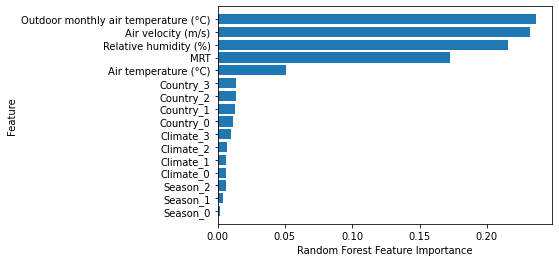

In [ ]:
def plot_feature_importance(model):
    n_features = x_all.shape[1]
    plt.barh(np.arange(n_features), sorted(model.feature_importances_), align="center")
    plt.yticks(np.arange(n_features), x_all.columns)
    plt.xlabel("Random Forest Feature Importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    
plot_feature_importance(clf2)

In [ ]:
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from subprocess import check_call
from sklearn import metrics

tree_model = DecisionTreeClassifier(max_depth=3)
tree_model.fit(x_train,y_train)
y_pred_tr = tree_model.predict(x_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred_tr))

Accuracy: 0.61


In [ ]:
import sklearn
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 
print('Decision Tree MSE:',sklearn.metrics.mean_squared_error(y_test, y_pred_tr))
print('Decision Tree R^2:',sklearn.metrics.r2_score(y_test, y_pred_tr))


Decision Tree MSE: 0.4214271595176912
Decision Tree R^2: -0.030032345523148374


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred_tr))


              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       680
           0       0.59      0.90      0.72      2845
           1       0.59      0.30      0.39      1534

    accuracy                           0.59      5059
   macro avg       0.39      0.40      0.37      5059
weighted avg       0.51      0.59      0.52      5059



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Gradient Boosting Tree

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(random_state=0, max_depth=3)
gbrt.fit(x_train, y_train.values.ravel())
print("Accuracy on training set: {:.3f}".format(gbrt.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(x_test, y_test)))

Accuracy on training set: 0.645
Accuracy on test set: 0.640


In [ ]:
y_pred_gbt = gbrt.predict(x_test)

In [ ]:
import sklearn
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 
print('Gradient Boosting Tree MSE:',sklearn.metrics.mean_squared_error(y_test, y_pred_gbt))
print('Gradient Boosting Tree R^2:',sklearn.metrics.r2_score(y_test, y_pred_gbt))


Gradient Boosting Tree MSE: 0.41016011069381303
Gradient Boosting Tree R^2: -0.002493957298561389


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred_gbt))

              precision    recall  f1-score   support

          -1       0.73      0.19      0.30       680
           0       0.65      0.86      0.74      2845
           1       0.60      0.44      0.51      1534

    accuracy                           0.64      5059
   macro avg       0.66      0.49      0.52      5059
weighted avg       0.64      0.64      0.61      5059



# Naive Bayes

There are three types of Naive Bayes models: Gaussian, Multinomial, and Bernoulli.

- Gaussian Naive Bayes - This is a variant of Naive Bayes which supports continuous values and has an assumption that each class is normally distributed.
- Multinomial Naive Bayes - This is another variant which is an event-based model that has features as vectors where sample(feature) represents frequencies with which certain events have occurred.
- Bernoulli - This variant is also event-based where features are independent boolean which are in binary form.

### GaussianNB


In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred_test_gnb = gnb.fit(x_train, y_train).predict(x_test)
y_pred_train_gnb = gnb.fit(x_train, y_train).predict(x_train)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print("Accuracy on training set_GaussianNB: {:.3f}".format(gnb.score(x_train, y_train)))
print("Accuracy on test set_GaussianNB: {:.3f}".format(gnb.score(x_test, y_test)))

Accuracy on training set_GaussianNB: 0.559
Accuracy on test set_GaussianNB: 0.547


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred_test_gnb))

              precision    recall  f1-score   support

          -1       0.29      0.18      0.22       680
           0       0.64      0.67      0.66      2845
           1       0.44      0.47      0.46      1534

    accuracy                           0.55      5059
   macro avg       0.46      0.44      0.45      5059
weighted avg       0.53      0.55      0.54      5059



### BernoulliNB

In [ ]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
y_pred_test_bnb = bnb.fit(x_train, y_train).predict(x_test)
y_pred_train_bnb = bnb.fit(x_train, y_train).predict(x_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print("Accuracy on training set_BernoulliNB: {:.3f}".format(bnb.score(x_train, y_train)))
print("Accuracy on test set_BernoulliNB: {:.3f}".format(bnb.score(x_test, y_test)))

Accuracy on training set_BernoulliNB: 0.556
Accuracy on test set_BernoulliNB: 0.554


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred_test_bnb))

              precision    recall  f1-score   support

          -1       0.23      0.02      0.04       680
           0       0.62      0.72      0.67      2845
           1       0.44      0.48      0.46      1534

    accuracy                           0.55      5059
   macro avg       0.43      0.41      0.39      5059
weighted avg       0.51      0.55      0.52      5059



(1) Classification

- R-square (R^2) 이 클 수록 좋다
- MSE, MAE, MAPE 이 작을 수록 좋다
  
- 정확도, 정밀도,재현율,F1-score




